In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
import os
def GetRoot(user = None):
    '''
    Deterimines what the root path is for google collab.

    Directory layout should be as follows:

    Parent
        -src
            -sample_based
        -data
            -aging
            -binary
            -breast_cancer

    src should contain all the code 
    data should contain all the datasets.
    
    Inputs:
    user (str): Name of the person using this notebook.

    Output:
    (str) root path
    '''
    if user.lower() == 'jackie':
        root = '/content/drive/MyDrive/AUTOMATION/DarthImputer(AutomationProject)'
    elif user.lower() == 'thomas':
        root = '/content/drive/MyDrive/Colab Notebooks/DarthImputer(AutomationProject)'
    elif user.lower() == 'gabe':
        root = '/content/drive/MyDrive/DarthImputer(AutomationProject)'
    else:
        print('Assuming that this is not being run on Google Collab. So setting the "root" to '+ \
              'parent of current working directory')
        root = os.getcwd()
        root = '/'.join(root.split('/')[:-1])

    return root

root = GetRoot("jackie")
sys.path.append(f'{root}/src')

In [7]:
import numpy as np
import importlib
import active_learning
import mice
import AL_Uncertainty_MICE_v2

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
directory = root + '/data/aging'


In [18]:
true_X = np.load(f'{root}/data/aging/features.npy')
masked_X = np.load(f'{root}/data/aging/masked_features.npy')
y = np.load(f'{root}/data/aging/labels.npy')
train_indices = np.load(f'{root}/data/aging/train_idxs.npy')
test_indices = np.load(f'{root}/data/aging/test_idxs.npy')

# Masked data have shape: number of %, number of version for the same % missing, num instance, num features

In [24]:
test_X = masked_X[0,0,:,:]
test_X.shape

(714, 14)

In [ ]:
all_cv_cumir, all_unseen_cumir = [], []
all_cv_gini, all_unseen_gini = [], []
all_cv_random, all_unseen_random = [], []
all_cv_lc, all_unseen_lc = [], []
all_cv_entropy, all_unseen_entropy = [], []
all_cv_margin, all_unseen_margin = [], []
all_cv_qbc, all_unseen_qbc = [], []
all_cv_density, all_unseen_density = [], []

In [82]:
importlib.reload(AL_Uncertainty_MICE_v2)
importlib.reload(mice)

filepath1 = directory + '/ALUC_MICE_cv_cumir.npy'
filepath2 = directory + '/ALUC_MICE_cv_random.npy'
filepath3 = directory + '/ALUC_MICE_cv_entropy.npy'
filepath4 = directory + '/ALUC_MICE_cv_leastconfidence.npy'
filepath5 = directory + '/ALUC_MICE_cv_margin.npy'
filepath6 = directory + '/ALUC_MICE_cv_gini.npy'
filepath7 = directory + '/ALUC_MICE_cv_qbc.npy'
filepath8 = directory + '/ALUC_MICE_cv_density.npy'

num_percents, num_masks, n, f = masked_X.shape


pointer = 0
masked_to_try = 3

test1, test2 = [], []

for p in [3,4]:
  p_cv_cumir, p_unseen_cumir = [], []
  p_cv_gini, p_unseen_gini = [], []
  p_cv_random, p_unseen_random = [], []
  p_cv_lc, p_unseen_lc = [], []
  p_cv_entropy, p_unseen_entropy = [], []
  p_cv_margin, p_unseen_margin = [], []
  p_cv_qbc, p_unseen_qbc= [], []
  p_cv_density, p_unseen_density = [], []

  for i in range(1):
      print(f'===================={pointer}/{num_percents*masked_to_try}====================')
      pointer+=1

      X = masked_X[p,i]
      train_idx = train_indices[i]
      test_idx = test_indices[i]

      cumir_cv, cumir_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                                imputation_method='mice', imputation_m=4, \
                                                                                seed = 174, batch_k=2 ,\
                                                                                query_method = 'cumir', end_portion=0.0
                                                                                )
      p_cv_cumir.append(cumir_cv)
      p_unseen_cumir.append(cumir_unseen)

      # random_cv, random_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'random', end_portion=0.0
                                                                                # )
      # p_cv_random.append(random_cv)
      # p_unseen_random.append(random_unseen)

      # entropy_cv, entropy_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'entropy', end_portion=0.0
      #                                                                           )
      # p_cv_entropy.append(entropy_cv)
      # p_unseen_entropy.append(entropy_unseen)

      # lc_cv, lc_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'least_confidence', end_portion=0.0
      #                                                                           )
      # p_cv_lc.append(lc_cv)
      # p_unseen_lc.append(lc_unseen)

      # margin_cv, margin_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'margin', end_portion=0.0
      #                                                                           )
      # p_cv_margin.append(margin_cv)
      # p_unseen_margin.append(margin_unseen)

      # gini_cv, gini_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'gini', end_portion=0.0
      #                                                                           )
      # p_cv_gini.append(gini_cv)
      # p_unseen_gini.append(gini_unseen)


      # qbc_cv, qbc_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'qbc', end_portion=0.0
      #                                                                           )
      # p_cv_qbc.append(qbc_cv)
      # p_unseen_qbc.append(qbc_unseen)

      # density_cv, density_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
      #                                                                           imputation_method='mice', imputation_m=4, \
      #                                                                           seed = 174, batch_k=2 ,\
      #                                                                           query_method = 'density', end_portion=0.0
      #                                                                           )
      # p_cv_density.append(density_cv)
      # p_unseen_density.append(density_unseen)

  test1.append(p_cv_cumir)
  test2.append(p_unseen_cumir)

  print(test1.shape, test2.shape)
  print(np.array([test1,test2]).shape)



  # # all_cv_gini.append(p_cv_gini)
  # # all_unseen_gini.append(p_unseen_gini)

  # all_cv_random.append(p_cv_random)
  # all_unseen_random.append(p_unseen_random)

  # # all_cv_lc.append(p_cv_lc)
  # # all_unseen_lc.append(p_unseen_lc)

  # all_cv_entropy.append(p_cv_entropy)
  # all_unseen_entropy.append(p_unseen_entropy)

  # # all_cv_margin.append(p_cv_margin)
  # # all_unseen_margin.append(p_unseen_margin)

  # all_cv_qbc.append(p_cv_qbc)
  # all_unseen_qbc.append(p_unseen_qbc)

  # all_cv_density.append(p_cv_density)
  # all_unseen_density.append(p_unseen_density)

  # np.save(filepath1, np.array([all_cv_cumir,all_unseen_cumir]))
  # np.save(filepath2, np.array([all_cv_random, all_unseen_random]))
  # np.save(filepath3, np.array([all_cv_entropy, all_unseen_entropy]))
  # # np.save(filepath4, np.array([all_cv_lc, all_unseen_lc]))
  # # np.save(filepath5, np.array([all_cv_margin, all_unseen_margin]))
  # # np.save(filepath6, np.array([all_cv_gini, all_unseen_gini]))
  # np.save(filepath7, np.array([all_cv_qbc, all_unseen_qbc]))
  # np.save(filepath8, np.array([all_cv_density, all_unseen_density]))

====================0/15====================


Finished!


Finished!


Finished!


Finished!


AL seed 174: 320it [00:39,  8.03it/s, cv_acc=0.5197, unseen_acc=1.0000]


AttributeError: 'list' object has no attribute 'shape'

In [87]:
np.array(test1).shape, np.array(test2).shape, np.array([test1, test2]).shape

((1, 1, 320), (1, 1, 320), (2, 1, 1, 320))

In [78]:
np.array(all_cv_cumir).shape

(5, 3, 320)

In [ ]:
all_cv_cumir

In [55]:
importlib.reload(AL_Uncertainty_MICE_v2)
importlib.reload(mice)

# filepath = directory + '/ALUC_MICE.npy'
# num_percents, num_masks, n, f = masked_X.shape

# unseen_acc = []
# cv_acc = []
for i in range(1):
    X = masked_X[0,i,:,:]
    train_idx = train_indices[i]
    test_idx = test_indices[i]

    cumir_cv, cumir_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'cumir', end_portion=0.0
                                                                              )

    random_cv, random_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'random', end_portion=0.0
                                                                              )

    entropy_cv, entropy_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'entropy', end_portion=0.0
                                                                              )

    lc_cv, lc_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'least_confidence', end_portion=0.0
                                                                              )

    margin_cv, margin_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'margin', end_portion=0.0
                                                                              )

    gini_cv, gini_unseen = AL_Uncertainty_MICE_v2.ActiveLearningWithImputationWithUncertainty(X, true_X, y, train_idx, test_idx, \
                                                                              imputation_method='mice', imputation_m=4, \
                                                                              seed = 174, batch_k=2 ,\
                                                                              query_method = 'gini', end_portion=0.0
                                                                              )
    # unseen_acc.append(unseen)


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 320it [00:38,  8.32it/s, acc=0.0000]


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 322it [00:31, 10.32it/s, acc=0.0000]


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 320it [00:30, 10.39it/s, acc=0.0000]


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 320it [00:30, 10.42it/s, acc=1.0000]


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 320it [00:32,  9.74it/s, acc=0.5000]


Converged and Finished!


Converged and Finished!


Converged and Finished!


Converged and Finished!


AL seed 174: 320it [00:31, 10.05it/s, acc=0.5000]


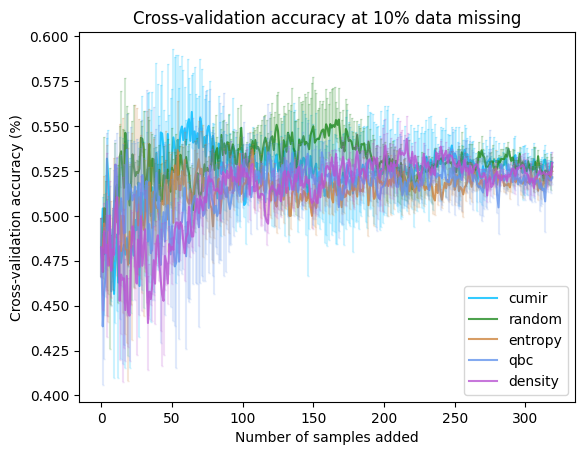

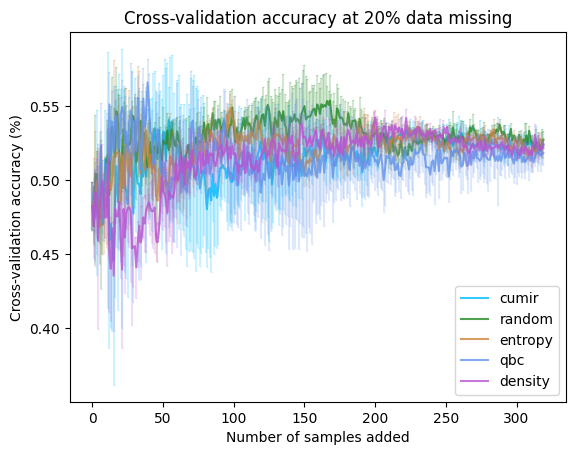

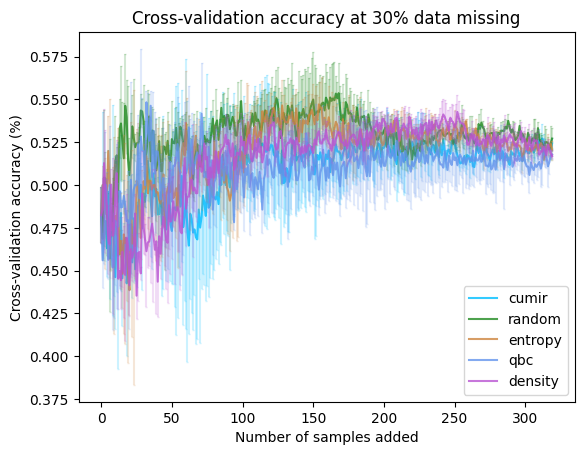

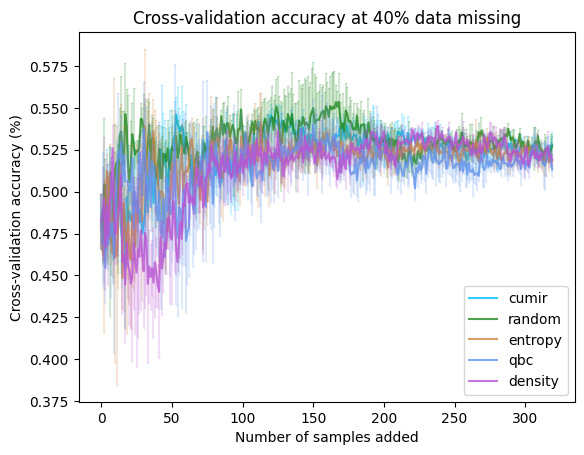

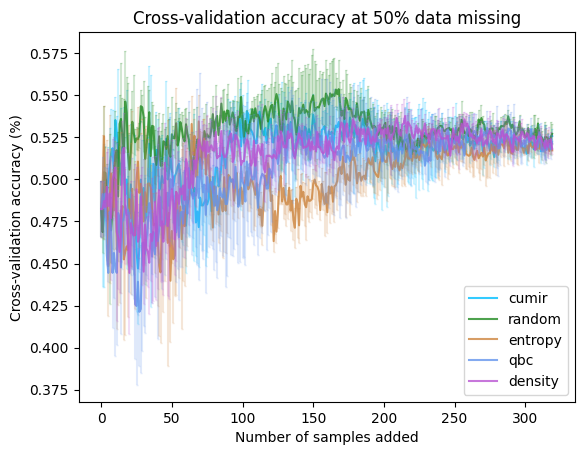

In [110]:
import matplotlib.pyplot as plt

num_file, num_percent, num_sim, num_time_step = 2, 5, 3, 320

filepath1 = directory + '/ALUC_MICE_cv_cumir.npy'
filepath2 = directory + '/ALUC_MICE_cv_random.npy'
filepath3 = directory + '/ALUC_MICE_cv_entropy.npy'
filepath7 = directory + '/ALUC_MICE_cv_qbc.npy'
filepath8 = directory + '/ALUC_MICE_cv_density.npy'

big_path = [filepath1, filepath2,filepath3,filepath7,filepath8]
method_name = ['cumir', 'random', 'entropy', 'qbc', 'density']
colors = ['deepskyblue','forestgreen', 'peru', 'cornflowerblue', 'mediumorchid', ]

for p in range(num_percent):
  plt.figure()

  for i, path in enumerate(big_path):

    data = np.load(path) # 2 x percent x simulation x time step

    cv_acc, _ = data[0], data[1]

    mean_cv = np.mean(cv_acc[p], axis=0)[:num_time_step]
    std_cv = np.std(cv_acc[p], axis=0)[:num_time_step]

    plt.plot(mean_cv, c=colors[i], label=method_name[i], alpha=0.8)
    # plt.errorbar(np.arange(num_time_step)[::5], mean_cv[::5], yerr=std_cv[::5], fmt='none', color=colors[i], alpha=0.3, capsize=1)
    plt.errorbar(np.arange(num_time_step), mean_cv, yerr=std_cv, fmt='none', color=colors[i], alpha=0.2, capsize=1)


  plt.xlabel('Number of samples added')
  plt.ylabel('Cross-validation accuracy (%)')
  plt.title(f'Cross-validation accuracy at {(p+1)*10}% data missing')
  plt.legend()

  plt.savefig(f'{root}/figs/aging_ALUC_{(p+1)*10}.png')

  plt.show()

In [114]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def OfflineLearning(X, y):

    model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=147)
    model.fit(X, y)

    cv_acc = cross_val_score(model, X, y, cv=3)
    mean_cv = np.mean(cv_acc)

    return mean_cv


In [115]:
offline_cv = OfflineLearning(true_X, y)


In [116]:
offline_cv

0.5196078431372548